In [1]:
# Add soil model and other functions
#Pkg.add("Plots")
#Pkg.add("BackendPackage")
#Pkg.add("GR")!)
#using Pkg
using Plots

include("thermal_properties.jl")
include("kersten.jl")
include("heat_capacity.jl")
include("internal_energy.jl")
include("temperature_calculator.jl")

temperature_calculator (generic function with 1 method)

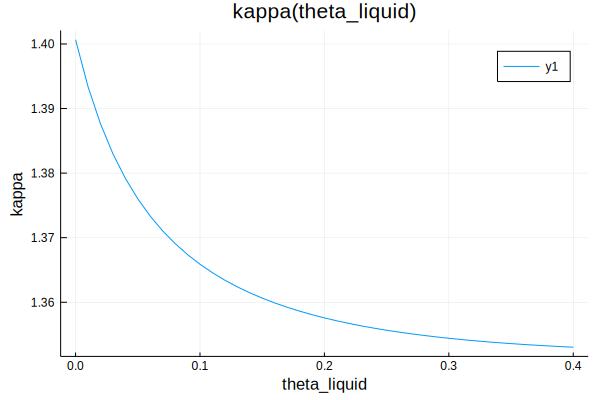

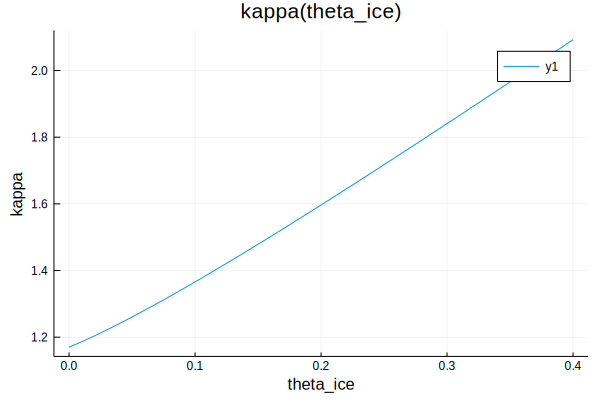

In [12]:
using Plots
gr() 

mineral_properties = "Clay" # "Sand"
theta_liquidi = 0:0.01:0.4
theta_icei = 0:0.01:0.4    #0:0.1.1:0.4
κ_out1=rand(Float64, length(theta_liquidi))
κ_out2=rand(Float64, length(theta_icei))

for i=1:length(theta_liquidi)
    # Define thermal conductivity of soil
    theta_ice=0.1
    theta_liquid=theta_liquidi[i]
    κ_out1[i] = (thermal_properties(mineral_properties,theta_liquid,theta_ice))
end

for i=1:length(theta_icei)
    # Define thermal conductivity of soil
    theta_liquid=0.1
    theta_ice=theta_icei[i]
    κ_out2[i] = (thermal_properties(mineral_properties,theta_liquid,theta_ice))
end

display(plot(theta_liquidi, κ_out1,
xlabel = "theta_liquid",
ylabel = "kappa ",
title  = "kappa(theta_liquid)"))

display(plot(theta_icei, κ_out2,
xlabel = "theta_ice",
ylabel = "kappa",
title  = "kappa(theta_ice)"))

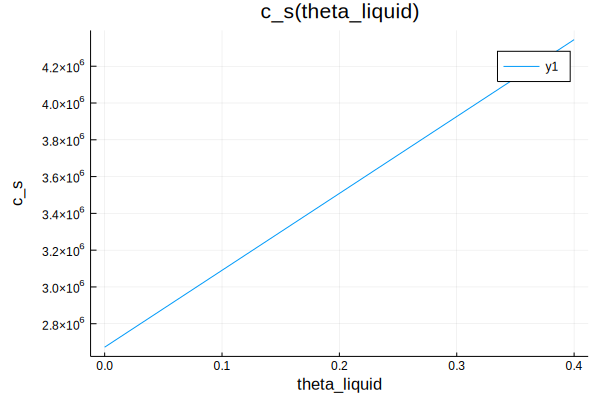

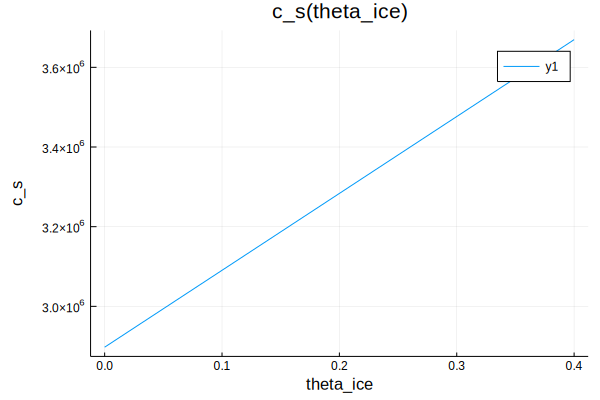

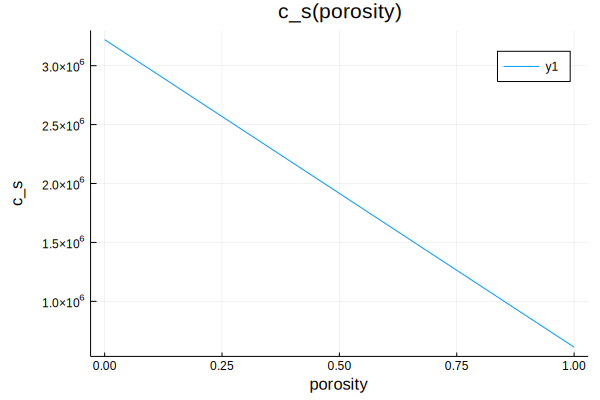

In [16]:
## Define parameters

## Porosity has to be smaller than 1 - theta_ice - theta_liquid, and even smaller to account for space occupied by soil

mineral_properties = "Clay" # "Sand"
porosityi = 0:0.01:1
theta_liquidi = 0:0.01:0.4
theta_icei = 0:0.01:0.4    
c_s1=rand(Float64, length(theta_liquidi))
c_s2=rand(Float64, length(theta_icei))
c_s3=rand(Float64, length(porosityi))

## Call functions

for i=1:length(theta_liquidi)
    # Define heat capacity of soil
    porosity=0.05
    theta_ice=0.1
    theta_liquid=theta_liquidi[i]
    c_s1[i] = heat_capacity(mineral_properties,porosity,theta_liquid,theta_ice) 
end

for i=1:length(theta_icei)
    # Define heat capacity of soil
    porosity=0.05
    theta_ice=theta_icei[i]
    theta_liquid=0.1
    c_s2[i] = heat_capacity(mineral_properties,porosity,theta_liquid,theta_ice) 
end

for i=1:length(porosityi)
    # Define heat capacity of soil
    porosity=porosityi[i]
    theta_ice=0.1
    theta_liquid=0.1
    c_s3[i] = heat_capacity(mineral_properties,porosity,theta_liquid,theta_ice) 
end

## Plot

display(plot(theta_liquidi, c_s1,
xlabel = "theta_liquid",
ylabel = "c_s",
title  = "c_s(theta_liquid)"))

display(plot(theta_icei, c_s2,
xlabel = "theta_ice",
ylabel = "c_s",
title  = "c_s(theta_ice)"))

display(plot(porosityi, c_s3,
xlabel = "porosity",
ylabel = "c_s",
title  = "c_s(porosity)"))

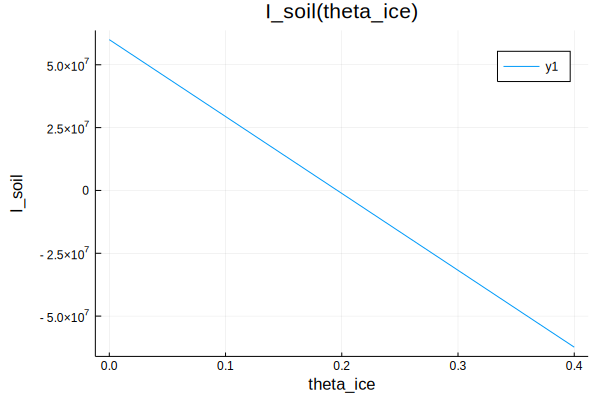

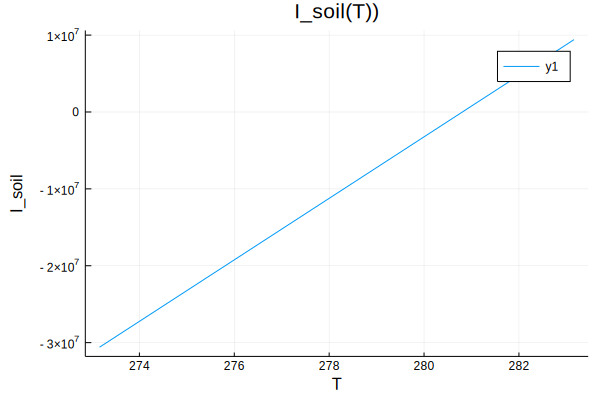

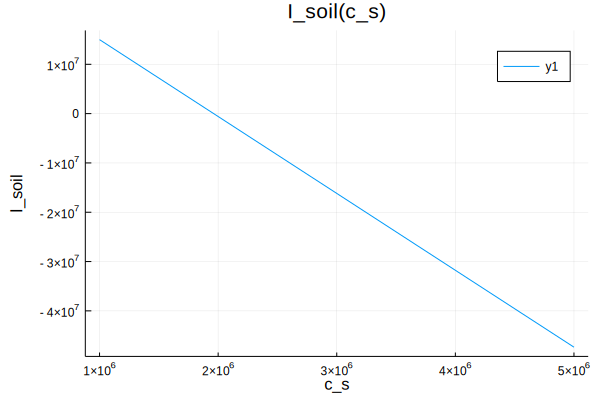

In [53]:
## Define parameters

mineral_properties = "Clay" # "Sand"
np = 10 # number of points to plot
Ti = range(273.16, stop=283.16, length=np)
theta_icei = range(0, stop=0.4, length=np)
c_si = range(1e6, stop=5e6, length=np)
I_soil1 = rand(Float64, np)
I_soil2 = rand(Float64, np)
I_soil3 = rand(Float64, np)

## Call functions

# Vary theta_ice
for i = 1:np
    theta_ice = theta_icei[i]
    T = 288.16
    c_s = 4e6
    # Define Internal Energy of soil
    I_soil1[i] = internal_energy(c_s,T,theta_ice) 
end

# Vary T
for i = 1:np
    theta_ice = 0.1
    T = Ti[i]
    c_s = 4e6
    # Define Internal Energy of soil
    I_soil2[i] = internal_energy(c_s,T,theta_ice) 
end

# Vary c_s
for i = 1:np
    theta_ice = theta_icei[i]
    T = 288.16
    c_s = c_si[i]
    # Define Internal Energy of soil
    I_soil3[i] = internal_energy(c_s,T,theta_ice) 
end

# Plot

display(plot(theta_icei,I_soil1,
xlabel = "theta_ice",
ylabel = "I_soil",
title  = "I_soil(theta_ice)"))

display(plot(Ti, I_soil2,
xlabel = "T",
ylabel = "I_soil",
title  = "I_soil(T))"))

display(plot(c_si, I_soil3,
xlabel = "c_s",
ylabel = "I_soil",
title  = "I_soil(c_s)"))

In [42]:
# T0 = 273.16
# I_soil = -8.7337e6
# c_s = 2.8045e6
# theta_ice = 0.05

## Define parameters

mineral_properties = "Clay" # "Sand"
np = 10 # number of points to plot
theta_icei = range(0, stop=0.4, length=np)
I_soil = range(1e7, stop=5e7, length=np)
c_si = range(1e6, stop=5e6, length=np)
T_soil1 = rand(Float64, np)
T_soil2 = rand(Float64, np)
T_soil3 = rand(Float64, np)

## Call functions

# Vary theta_ice
for i = 1:np
    theta_ice = theta_icei[i]
    I_soil = 4e7
    c_s = 4e6
    # Define Temperature of soil
    T_soil1 = temperature_calculator(c_s,I_soil,theta_ice)
end

# Vary I_soil
for i = 1:np
    theta_ice = 0.1
    I_soil =  I_soili[i]  
    c_s = 4e6
    # Define Temperature of soil
    T_soil2 = temperature_calculator(c_s,I_soil,theta_ice)
end

# Vary c_s
for i = 1:np
    theta_ice = theta_icei[i]
    I_soil =  4e7  
    c_s = c_si[i]
    # Define Temperature of soil
    T_soil3 = temperature_calculator(c_s,I_soil,theta_ice)
end

# Plot
display(plot(theta_icei,I_soil1,
xlabel = "theta_ice",
ylabel = "T_soil",
title  = "T_soil1(theta_ice)"))

display(plot(I_soili, I_soil2,
xlabel = "I_soil",
ylabel = "T_soil",
title  = "T_soil2(I_soil))"))

display(plot(c_si, I_soil3,
xlabel = "c_s",
ylabel = "T_soil",
title  = "T_soil3(c_s)"))



UndefVarError: UndefVarError: I_soil not defined